<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-5/blob/main/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = 'creditcard.csv'
df = pd.read_csv(dataset_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)

y_encoded[np.arange(n_samples), y] = 1

In [ ]:
n_classes, n_samples

(2, 284807)

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffled = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b , y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffled
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train , y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffled
)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [ ]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_loss(y_hat, y):
    return (-1/y.size) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

In [ ]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [ ]:
n_features

31

In [ ]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    train_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}: train_loss: {train_loss:.3f}, val_loss: {val_loss:.3f}")

Epoch 1: train_loss: 12.116, val_loss: 38.389
Epoch 2: train_loss: 11.899, val_loss: 37.731
Epoch 3: train_loss: 11.697, val_loss: 37.094
Epoch 4: train_loss: 11.508, val_loss: 36.474
Epoch 5: train_loss: 11.328, val_loss: 35.870
Epoch 6: train_loss: 11.156, val_loss: 35.284
Epoch 7: train_loss: 10.991, val_loss: 34.717
Epoch 8: train_loss: 10.833, val_loss: 34.171
Epoch 9: train_loss: 10.682, val_loss: 33.641
Epoch 10: train_loss: 10.536, val_loss: 33.125
Epoch 11: train_loss: 10.394, val_loss: 32.617
Epoch 12: train_loss: 10.255, val_loss: 32.115
Epoch 13: train_loss: 10.119, val_loss: 31.616
Epoch 14: train_loss: 9.985, val_loss: 31.121
Epoch 15: train_loss: 9.854, val_loss: 30.627
Epoch 16: train_loss: 9.724, val_loss: 30.137
Epoch 17: train_loss: 9.597, val_loss: 29.649
Epoch 18: train_loss: 9.472, val_loss: 29.164
Epoch 19: train_loss: 9.350, val_loss: 28.680
Epoch 20: train_loss: 9.230, val_loss: 28.199
Epoch 21: train_loss: 9.113, val_loss: 27.719
Epoch 22: train_loss: 8.998, v

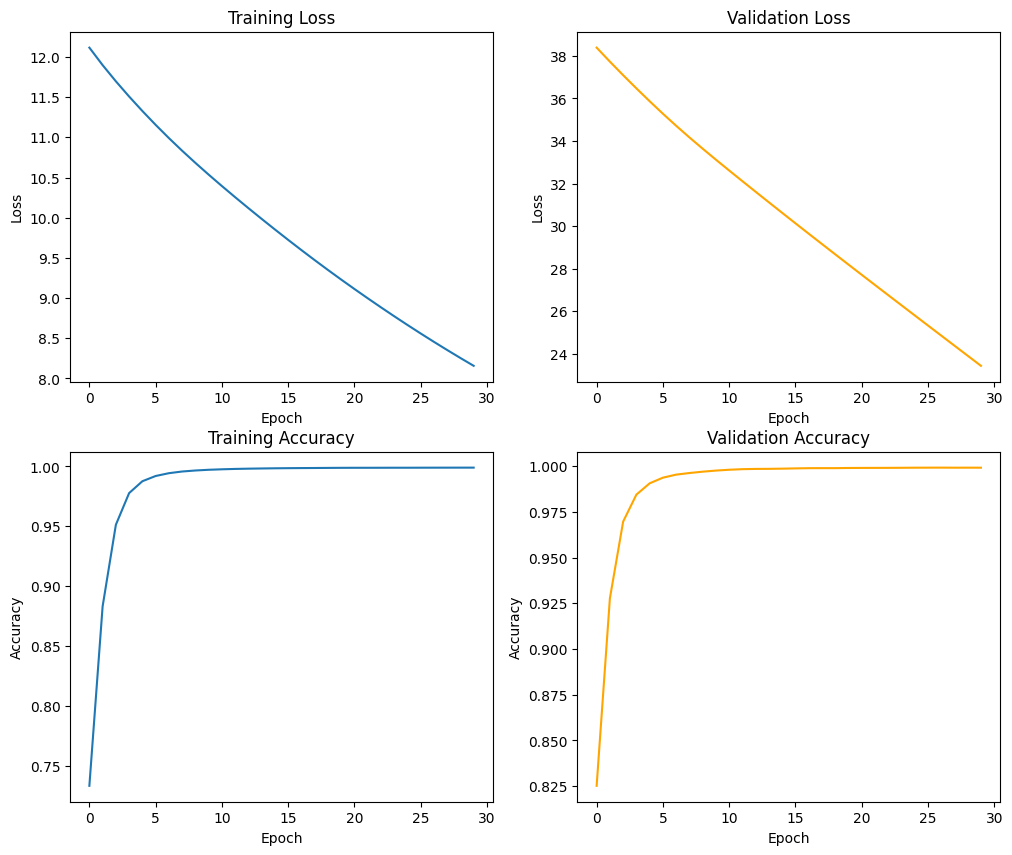

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set: ')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set: 
Accuracy: 0.9992099996488887
Accuracy: 0.9991222218320986


# Twitter Sentiment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
dataset_path = 'Twitter_Data.csv'
df = pd.read_csv(dataset_path)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [5]:
df = df.dropna()
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [6]:
def text_normalize(text):
    # Lowercasing
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [7]:
df['clean_text'] = df['clean_text'].apply(text_normalize)
df

<ipython-input-7-07ae53d0a1f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(text_normalize)


,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0
...,...,...
162975,456 crore paid neerav modi recov congress lead...,-1.0
162976,dear rss terrorist payal gawar modi kill 1000 ...,-1.0
162977,cover interact forum left,0.0
162978,big project came india modi dream project happ...,0.0


In [8]:
vectorize = TfidfVectorizer(max_features=2000)
X = vectorize.fit_transform(df['clean_text']).toarray()

In [9]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [10]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)]
)
y_encoded[np.arange(n_samples), y] = 1

In [11]:
n_classes, n_samples

(3, 162969)

In [12]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffled = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b , y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffled
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train , y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffled
)

In [13]:
def softmax(z):
    return np.exp(z) / np.exp(z).sum(axis =1)[:, None]

In [14]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def compute_loss(y_hat, y):
    return (-1/y.size) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

In [15]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [16]:
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    val_batch_losses.append(val_loss)
    val_batch_accs.append(val_acc)

    train_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch + 1}: train_loss: {train_loss:.3f}, val_loss: {val_loss:.3f}")

Epoch 1: train_loss: 0.384, val_loss: 0.384
Epoch 2: train_loss: 0.384, val_loss: 0.384
Epoch 3: train_loss: 0.384, val_loss: 0.383
Epoch 4: train_loss: 0.383, val_loss: 0.383
Epoch 5: train_loss: 0.383, val_loss: 0.383
Epoch 6: train_loss: 0.382, val_loss: 0.382
Epoch 7: train_loss: 0.382, val_loss: 0.382
Epoch 8: train_loss: 0.382, val_loss: 0.382
Epoch 9: train_loss: 0.382, val_loss: 0.381
Epoch 10: train_loss: 0.381, val_loss: 0.381
Epoch 11: train_loss: 0.381, val_loss: 0.381
Epoch 12: train_loss: 0.381, val_loss: 0.380
Epoch 13: train_loss: 0.380, val_loss: 0.380
Epoch 14: train_loss: 0.380, val_loss: 0.380
Epoch 15: train_loss: 0.380, val_loss: 0.380
Epoch 16: train_loss: 0.380, val_loss: 0.379
Epoch 17: train_loss: 0.379, val_loss: 0.379
Epoch 18: train_loss: 0.379, val_loss: 0.379
Epoch 19: train_loss: 0.379, val_loss: 0.378
Epoch 20: train_loss: 0.378, val_loss: 0.378
Epoch 21: train_loss: 0.378, val_loss: 0.378
Epoch 22: train_loss: 0.378, val_loss: 0.378
Epoch 23: train_los

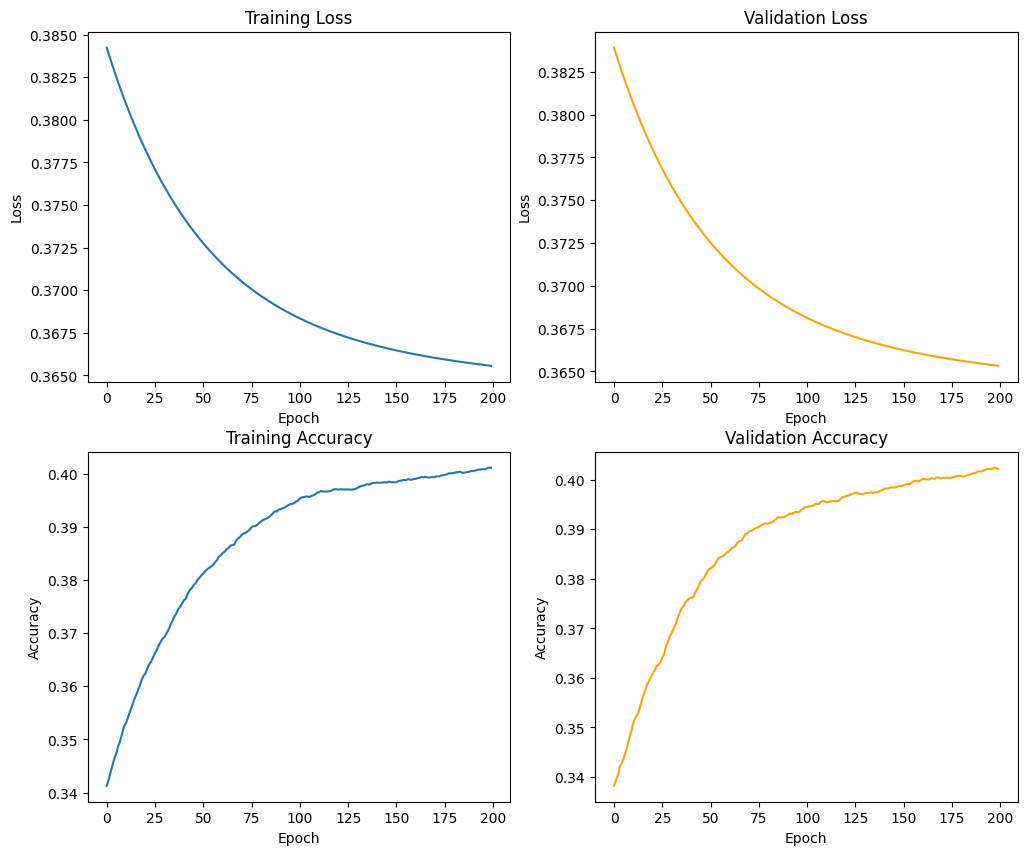

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [21]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set: ')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set: 
Accuracy: 0.40219058722464257
Accuracy: 0.4047370681720562
